<a href="https://colab.research.google.com/github/vineet1947/general_code-_files-/blob/main/catsvs_dogs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import matplotlib.pyplot as  plt 
import numpy as np 

In [2]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Loading

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'


In [4]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip' , origin = _URL  , extract  = True)

68616192/68606236 [==============================] - 0s 0us/step


In [5]:
zip_dir_base = os.path.dirname(zip_dir) 
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


#Understanding Data

In [6]:
base_dir = os.path.join(os.path.dirname(zip_dir) , 'cats_and_dogs_filtered') 
train_dir = os.path.join(base_dir , 'train') 
validation_dir = os.path.join(base_dir , 'validation') 


In [7]:
train_cats_dir = os.path.join(train_dir , 'cats') 
train_dogs_dir = os.path.join(train_dir , 'dogs') 
validation_cats_dir =  os.path.join(validation_dir , 'cats') 
validation_dogs_dir =  os.path.join(validation_dir , 'dogs') 


In [8]:
num_cats_tr = len(os.listdir(train_cats_dir)) 
num_dogs_tr = len(os.listdir(train_dogs_dir)) 

num_cats_val = len(os.listdir(validation_cats_dir)) 
num_dogs_val = len(os.listdir(validation_dogs_dir)) 

In [9]:
total_train =  num_cats_tr +  num_dogs_tr 
total_val = num_cats_val +  num_dogs_val 

#Setting Model parameter

In [10]:
BATCH_SIZE = 100 
IMG_SHAPE = 150


In [11]:
train_image_generator = ImageDataGenerator(rescale = 1./255) 
validation_image_generator = ImageDataGenerator(rescale = 1./255) 
 

In [12]:
train_data_gen  = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE , 
                                                            directory = train_dir , 
                                                            shuffle = True  , 
                                                            target_size = (IMG_SHAPE , IMG_SHAPE) , 
                                                            class_mode =  'binary') 


Found 2000 images belonging to 2 classes.


In [33]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


#Visulizing Images 

In [23]:
sample_training_images, _ = next(train_data_gen) 

In [26]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

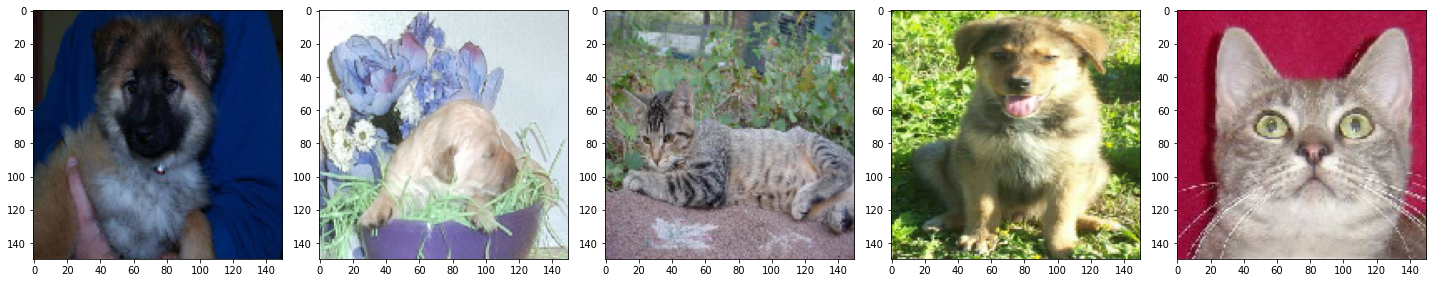

In [27]:
plotImages(sample_training_images[:5])  # Plot images 0-4

#Model Creation 

In [29]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(32 , (3 , 3) , activation= 'relu' , input_shape = (150  , 150 , 3) ) , 
     tf.keras.layers.MaxPooling2D(2,2) , 

     tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu') , 
     tf.keras.layers.MaxPooling2D(2,2) , 

     tf.keras.layers.Conv2D(128 ,  (3,3) , activation = 'relu') , 
     tf.keras.layers.MaxPooling2D(2,2) , 

     tf.keras.layers.Conv2D(128 ,  (3,3) , activation = 'relu') , 
     tf.keras.layers.MaxPooling2D(2,2) , 

     tf.keras.layers.Flatten() ,  
     tf.keras.layers.Dense(512 , activation  = 'softmax') , 
     tf.keras.layers.Dense(2)

     
    ]
)

#Compile Model 

In [32]:
model.compile(optimizer = 'adam' ,  
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) , metrics = ['accuracy'] ) 

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#Training the model 

In [ ]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

In [36]:
EPOCHS = 20 
history = model.fit_generator(
    train_data_gen , 
    steps_per_epoch =  int(np.ceil(total_train /  float(BATCH_SIZE))) , 
    epochs = EPOCHS , 
    validation_data = val_data_gen , 
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
20/20 [==============================] - 8s 413ms/step - loss: 0.0307 - accuracy: 0.9895 - val_loss: 1.3036 - val_accuracy: 0.7530
Epoch 2/20
20/20 [==============================] - 8s 412ms/step - loss: 0.0383 - accuracy: 0.9865 - val_loss: 1.2707 - val_accuracy: 0.7380
Epoch 3/20
20/20 [==============================] - 8s 411ms/step - loss: 0.0165 - accuracy: 0.9965 - val_loss: 1.3137 - val_accuracy: 0.7440
Epoch 4/20
20/20 [==============================] - 8s 416ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.4088 - val_accuracy: 0.7550
Epoch 5/20
20/20 [==============================] - 8s 412ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.4587 - val_accuracy: 0.7400
Epoch 6/20
20/20 [==============================] - 8s 413ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.5301 - val_accuracy: 0.7520
Epoch 7/20
20/20 [==============================] - 8s 428ms/step - loss: 5.8254e-04 - accuracy: 1.0000 - val_loss: 1.5791 - val_accuracy: 0.7490
Ep

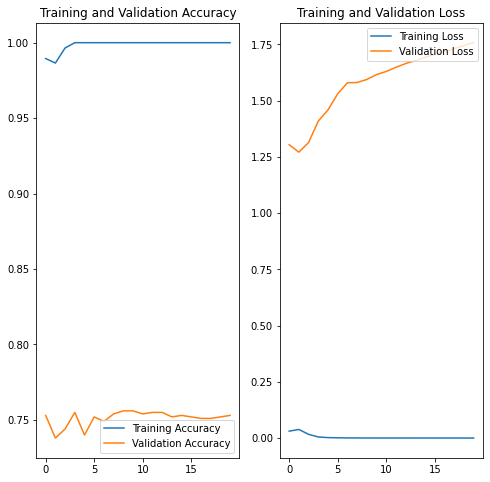

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()